# Lab 6.02 - Regression analysis

In [93]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [94]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [95]:
farms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        41 non-null     int64  
 1   number_of_farms             41 non-null     int64  
 2   average_area_per_farm_(ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


3. Draw a scatter plot of the number of farms versus the year.


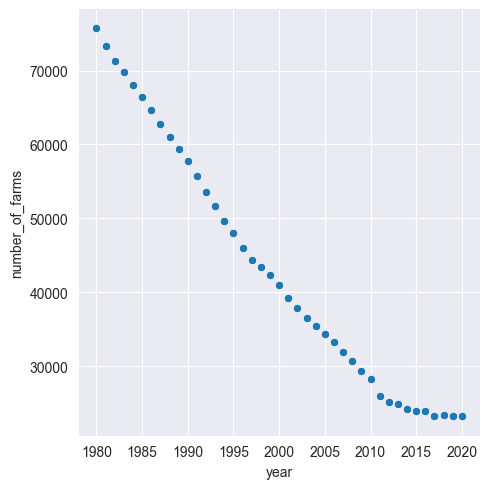

In [96]:
sns.relplot(data=farms, x='year', y='number_of_farms')

In [97]:
x = farms.year
y = farms.number_of_farms
a, b = np.polyfit(x, y, 1)
print(f' y {a} * x + {b}')

 y -1384.6505226480979 * x + 2812825.1428571716


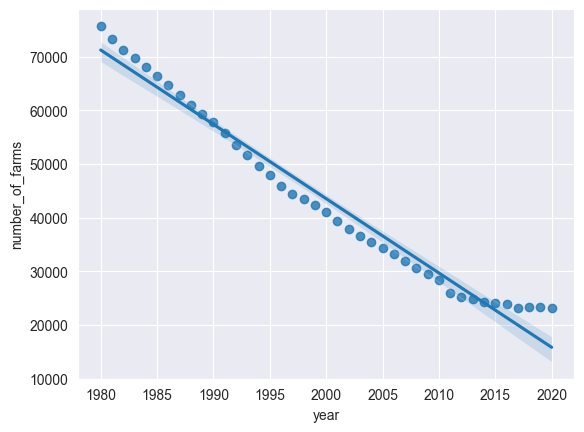

In [98]:
sns.regplot(data=farms, x=x, y=y);

In [99]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(x,y)[0][1]
print(f"R ≈ {cor:.4f}")
print(f"R^2 ≈ {cor**2:.4f}")

R ≈ -0.9861
R^2 ≈ 0.9724


4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [100]:
# R < 0 => dalend verband
# abs(R) = 0.98 => exceptionally strong

6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [101]:
# R2 = 0.97 => expcetionally strong verband

7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

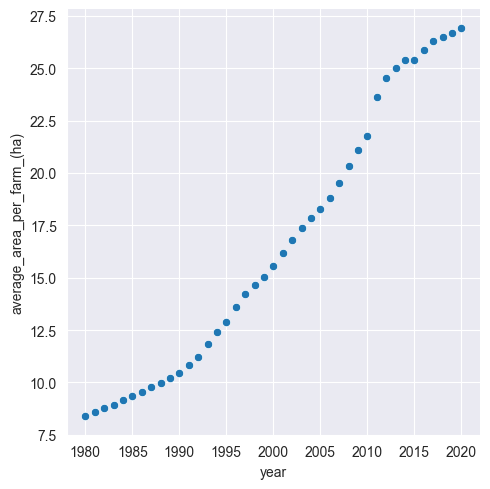

In [102]:
sns.relplot(data=farms, x='year', y='average_area_per_farm_(ha)')

In [103]:
x = farms.year
y = farms['average_area_per_farm_(ha)']
a, b = np.polyfit(x, y, 1)
print(f' y {a} * x + {b}')

 y 0.5242334494773593 * x + -1031.8951916376454


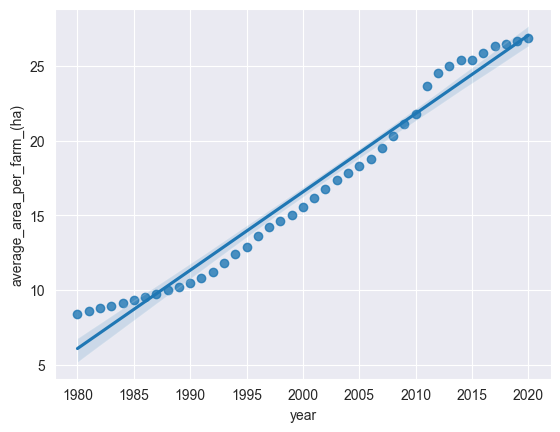

In [104]:
sns.regplot(data=farms, x=x, y=y);

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [105]:
# y = a*x + b
area20235 = a * 2035 + b
print(area20235)

34.919878048780674


In [106]:
from sklearn.linear_model import LinearRegression
x1 = farms.year.values.reshape(-1,1)
model = LinearRegression().fit(x1,y)
gemiddelde_2035 = model.predict([[2035]])
print(f'gemiddelde_2035 = {gemiddelde_2035}')

gemiddelde_2035 = [34.91987805]


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

In [107]:
farms["total_area_year"] = farms["number_of_farms"] * farms['average_area_per_farm_(ha)']
farms.head()
total_area_1980 = farms.iloc[0,3]

In [110]:
farms["change"] = farms["total_area_year"] / total_area_1980
farms.head()

,year,number_of_farms,average_area_per_farm_(ha),total_area_year,change
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


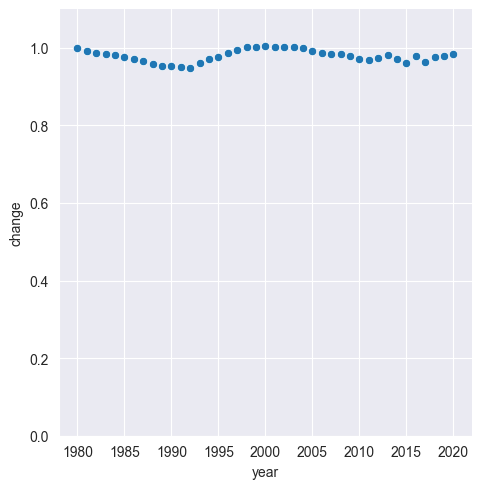

In [109]:
g = sns.relplot(data=farms, x='year', y='change')
g.set(ylim=(0,1.1))